In [5]:
from models.Models import CNN2D, CNN2D_LSTM, CNN1D_LSTM_AUDIO
from run_simulations import simulator
from data_utils import data_loader

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

# 2D CNN

## 4 Emotions

In [6]:
dl= data_loader.Data_loader()
data = dl.load_data(mfcc=True, chroma=True, mel=True)
m = simulator(data)
observed_emotions = ['calm', 'happy', 'fearful', 'disgust']
features_list = ['mfcc','mel']
N = len(observed_emotions)

X, Y = m.create_dataset(observed_emotions, features_list, vector_feature=False)
X, Y =  np.array(X), np.array(Y)

X = np.expand_dims( tf.keras.preprocessing.sequence.pad_sequences(X) ,axis = 3)
input_shape = (X.shape[1],X.shape[2],1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1337)

In [9]:
model = CNN2D(input_shape=input_shape, target_class_no=N )
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 82, 84, 16)        224       
_________________________________________________________________
sequential_6 (Sequential)    (None, 20, 21, 64)        9536      
_________________________________________________________________
sequential_7 (Sequential)    (None, 5, 5, 128)         74368     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1638912   
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 2052      
Total params: 1,725,092
Trainable params: 1,724,676
Non-trainable params: 416
__________________________________________

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
            optimizer='adam',
            metrics=['accuracy'])
# model.compile(loss='hinge', optimizer=tf.keras.optimizers.Adadelta(lr=0.1,rho=0.8), metrics=['acc'])
historyy = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), shuffle=True,  epochs = 100)

Text(30.5, 0.5, 'True label')

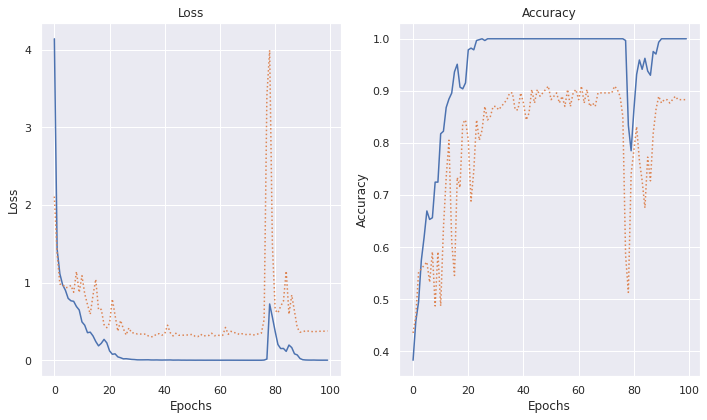

<Figure size 720x432 with 0 Axes>

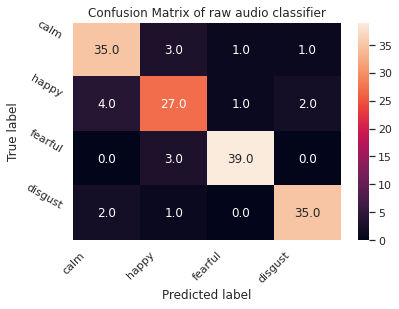

In [0]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(historyy.history['loss'],label="training data")
plt.plot(historyy.history['val_loss'],':',label="validation data")
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(122)
plt.plot(historyy.history['accuracy'],label="training accuracy")
plt.plot(historyy.history['val_accuracy'],':',label="validation accuracy")
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.tight_layout()


plt.figure(figsize=(10,6))
sns.set()
prediction = model.predict(X_test)
ground_truth = np.argmax(Y_test,axis=1)
pred = np.argmax(prediction,axis=1)
label_idx = np.arange(0,len(observed_emotions))
confusionMatrix = confusion_matrix(ground_truth, pred, labels=label_idx)
fig = plt.figure()   
sns.heatmap(confusionMatrix,annot=True, fmt=".1f")
#cmat_plot = plot_confusion_matrix(conf_mat=confusionMatrix, figsize=(5, 5))
plt.title("Confusion Matrix of raw audio classifier")
tick_marks = np.arange(len(observed_emotions))
plt.xticks(tick_marks, observed_emotions, rotation=45)
plt.yticks(tick_marks, observed_emotions,rotation=-30)
plt.xlabel('Predicted label')
plt.ylabel('True label')

## 8 Emotions

In [11]:
EMO_DICT= {0:'neutral', 1:'calm', 2:'happy', 3:'sad', 4:'angry', 5:'fearful', 6:'disgust', 7:'surprised'}

dl= data_loader.Data_loader()
data = dl.load_data(mfcc=True, chroma=True, mel=True)
m = simulator(data)
observed_emotions = [str(EMO_DICT[idx]) for idx in range(len(EMO_DICT))]

features_list = ['mel']
N = len(observed_emotions)

X, Y = m.create_dataset(observed_emotions, features_list, vector_feature=False)
X, Y =  np.array(X), np.array(Y)

X = np.expand_dims( tf.keras.preprocessing.sequence.pad_sequences(X),axis=0 )
X = np.squeeze(X)
X = np.expand_dims(X, axis=3)
input_shape = (X.shape[1],X.shape[2],1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1337)

In [0]:
model = CNN2D(input_shape=input_shape, target_class_no=N )

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
            optimizer='adam',
            metrics=['accuracy'])
# model.compile(loss='hinge', optimizer=tf.keras.optimizers.Adadelta(lr=0.1,rho=0.8), metrics=['acc'])
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), shuffle=True,  epochs = 80)

Epoch 1/80
32/32 [==============================] - 1s 23ms/step - loss: 2.5410 - accuracy: 0.2212 - val_loss: 2.2444 - val_accuracy: 0.2616
Epoch 2/80
32/32 [==============================] - 1s 16ms/step - loss: 1.9047 - accuracy: 0.2798 - val_loss: 1.9341 - val_accuracy: 0.3380
Epoch 3/80
32/32 [==============================] - 0s 16ms/step - loss: 1.8264 - accuracy: 0.3284 - val_loss: 2.0398 - val_accuracy: 0.3310
Epoch 4/80
32/32 [==============================] - 0s 15ms/step - loss: 1.7563 - accuracy: 0.3274 - val_loss: 1.7615 - val_accuracy: 0.3449
Epoch 5/80
32/32 [==============================] - 0s 15ms/step - loss: 1.7972 - accuracy: 0.3204 - val_loss: 1.8377 - val_accuracy: 0.2569
Epoch 6/80
32/32 [==============================] - 0s 16ms/step - loss: 1.7142 - accuracy: 0.3571 - val_loss: 1.7721 - val_accuracy: 0.3171
Epoch 7/80
32/32 [==============================] - 0s 16ms/step - loss: 1.6626 - accuracy: 0.3740 - val_loss: 1.7350 - val_accuracy: 0.3449
Epoch 8/80
32

Text(30.5, 0.5, 'True label')

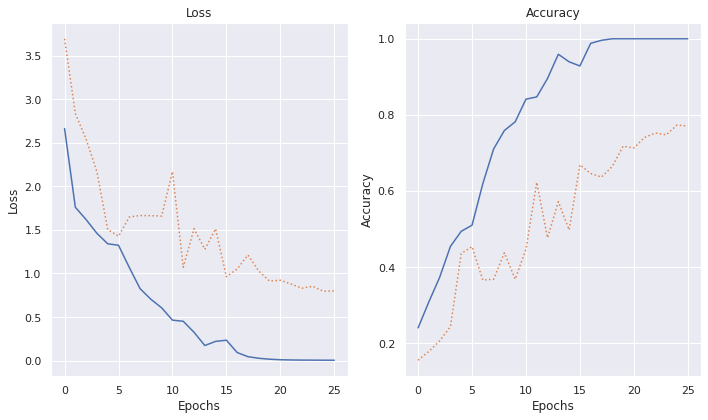

<Figure size 720x432 with 0 Axes>

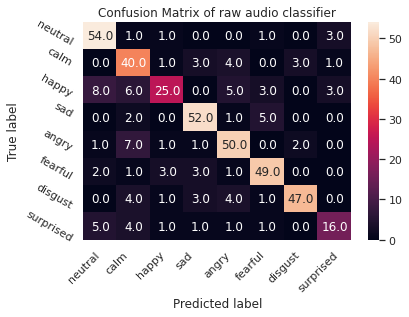

In [0]:

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(history.history['loss'],label="training data")
plt.plot(history.history['val_loss'],':',label="validation data")
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(122)
plt.plot(history.history['accuracy'],label="training accuracy")
plt.plot(history.history['val_accuracy'],':',label="validation accuracy")
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.tight_layout()


plt.figure(figsize=(10,6))
sns.set()
prediction = model.predict(X_test)
ground_truth = np.argmax(Y_test,axis=1)
pred = np.argmax(prediction,axis=1)
label_idx = np.arange(0,len(observed_emotions))
confusionMatrix = confusion_matrix(ground_truth, pred, labels=label_idx)
fig = plt.figure()   
sns.heatmap(confusionMatrix,annot=True, fmt=".1f")
#cmat_plot = plot_confusion_matrix(conf_mat=confusionMatrix, figsize=(5, 5))
plt.title("Confusion Matrix of raw audio classifier")
tick_marks = np.arange(len(observed_emotions))
plt.xticks(tick_marks, observed_emotions, rotation=45)
plt.yticks(tick_marks, observed_emotions,rotation=-30)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Audio

## CNN1d

In [0]:
EMO_DICT= {0:'neutral', 1:'calm', 2:'happy', 3:'sad', 4:'angry', 5:'fearful', 6:'disgust', 7:'surprised'}
dl= data_loader.Data_loader()
data = dl.load_data(mfcc=True, chroma=True, mel=True)
m = simulator(data)
#observed_emotions = [str(EMO_DICT[idx]) for idx in range(len(EMO_DICT))]
observed_emotions = ['calm', 'happy', 'fearful', 'disgust']
features_list = ['samples']
N = len(observed_emotions)

X, Y = m.create_dataset(observed_emotions, features_list, vector_feature=False)
X, Y =  np.array(X), np.array(Y)


xmin = np.min([len(x)for x in X])
X = np.array([x[0:xmin]for x in X])[:,:,np.newaxis]
# X = np.expand_dims( tf.keras.preprocessing.sequence.pad_sequences(X) ,axis = 2)
# mean = np.mean(X, axis=0); std = np.std(X, axis=0)
# X = np.nan_to_num((X - mean)/std, nan=0.0)
input_shape = (X.shape[1],1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1337)

(768, 46981, 1)

In [0]:
#model = CNN1D_AUDIO(input_shape=input_shape, target_class_no=N )
#opt = tf.keras.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.1)
#opt = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
#model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adadelta(lr=0.1,rho=0.8), metrics=['acc'])
model.fit(X_train, Y_train, validation_data=(X_test,Y_test), batch_size=15, shuffle=True,  epochs = 12)

Epoch 1/12
41/41 [==============================] - 3s 75ms/step - loss: 0.1240 - acc: 0.9544 - val_loss: 0.8231 - val_acc: 0.7403
Epoch 2/12
41/41 [==============================] - 2s 60ms/step - loss: 0.0547 - acc: 0.9805 - val_loss: 0.6414 - val_acc: 0.8117
Epoch 3/12
41/41 [==============================] - 2s 60ms/step - loss: 0.0605 - acc: 0.9805 - val_loss: 0.7229 - val_acc: 0.7987
Epoch 4/12
41/41 [==============================] - 2s 60ms/step - loss: 0.0575 - acc: 0.9870 - val_loss: 0.9896 - val_acc: 0.7857
Epoch 5/12
41/41 [==============================] - 2s 60ms/step - loss: 0.0305 - acc: 0.9902 - val_loss: 0.6770 - val_acc: 0.8312
Epoch 6/12
41/41 [==============================] - 2s 60ms/step - loss: 0.0696 - acc: 0.9821 - val_loss: 0.8672 - val_acc: 0.7662
Epoch 7/12
41/41 [==============================] - 2s 59ms/step - loss: 0.0197 - acc: 0.9951 - val_loss: 0.6568 - val_acc: 0.8571
Epoch 8/12
41/41 [==============================] - 2s 60ms/step - loss: 0.0608 - a

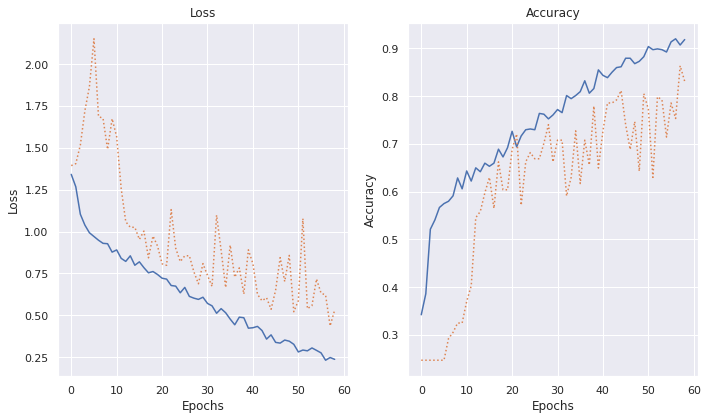

In [0]:
# plt.plot(history)
plt.figure(figsize=(10,6))
sns.set()
plt.subplot(121)
plt.plot(history.history['loss'][0:59],label="training data")
plt.plot(history.history['val_loss'][0:59],':',label="validation data")
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(122)
plt.plot(history.history['acc'][0:59],label="training accuracy")
plt.plot(history.history['val_acc'][0:59],':',label="validation accuracy")
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.tight_layout()

Text(30.5, 0.5, 'True label')

<Figure size 720x432 with 0 Axes>

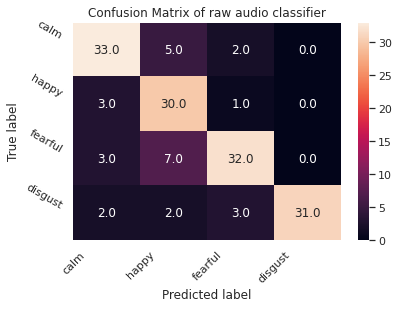

In [0]:
plt.figure(figsize=(10,6))
sns.set()
prediction = model.predict(X_test)
ground_truth = np.argmax(Y_test,axis=1)
pred = np.argmax(prediction,axis=1)
label_idx = np.arange(0,len(observed_emotions))
confusionMatrix = confusion_matrix(ground_truth, pred, labels=label_idx)
fig = plt.figure()   
sns.heatmap(confusionMatrix,annot=True, fmt=".1f")
#cmat_plot = plot_confusion_matrix(conf_mat=confusionMatrix, figsize=(5, 5))
plt.title("Confusion Matrix of raw audio classifier")
tick_marks = np.arange(len(observed_emotions))
plt.xticks(tick_marks, observed_emotions, rotation=45)
plt.yticks(tick_marks, observed_emotions,rotation=-30)
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [0]:
model.save("/content/drive/My Drive/Emotion_Recognition/backup/4emot_cnn1d")

INFO:tensorflow:Assets written to: /content/drive/My Drive/Emotion_Recognition/backup/4emot_cnn1d/assets


# 2D CNN + LSTM

## 4 Emotions

In [0]:
dl= data_loader.Data_loader()
data = dl.load_data(mfcc=True, chroma=True, mel=True)
m = simulator(data)
observed_emotions = ['calm', 'happy', 'fearful', 'disgust']
features_list = ['mfcc','mel','chroma']
N = len(observed_emotions)

X, Y = m.create_dataset(observed_emotions, features_list, vector_feature=False)
X, Y =  np.array(X), np.array(Y)

X = np.expand_dims( tf.keras.preprocessing.sequence.pad_sequences(X) ,axis = 3)
input_shape = (X.shape[1],X.shape[2],1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1337)

In [0]:
model = CNN2D(input_shape=input_shape, target_class_no=N )
opt = tf.keras.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.1)
#opt = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
            optimizer='rmsprop',
            metrics=['accuracy'])
# model.compile(loss='hinge', optimizer=tf.keras.optimizers.Adadelta(lr=0.1,rho=0.8), metrics=['acc'])
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), shuffle=True,  epochs = 70)

Model: "sequential_98"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_99 (Sequential)   (None, 82, 90, 64)        896       
_________________________________________________________________
sequential_100 (Sequential)  (None, 20, 22, 128)       74368     
_________________________________________________________________
sequential_101 (Sequential)  (None, 5, 5, 128)         148096    
_________________________________________________________________
reshape_3 (Reshape)          (None, None, 128)         0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dense_45 (Dense)             (None, 4)                 1028      
Total params: 618,628
Trainable params: 617,988
Non-trainable params: 640
_____________________________________________

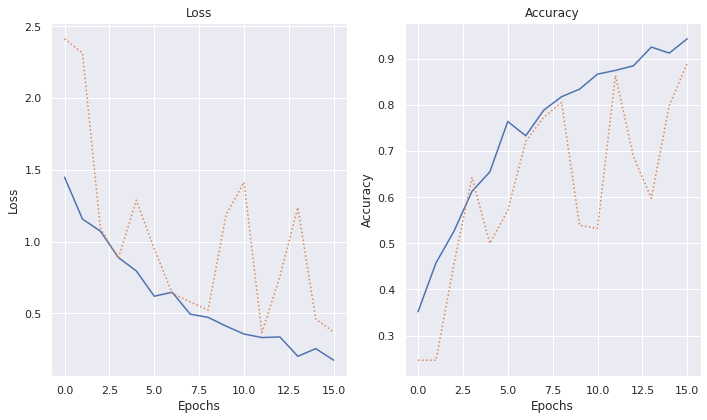

In [0]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(history.history['loss'],label="training data")
plt.plot(history.history['val_loss'],':',label="validation data")
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(122)
plt.plot(history.history['accuracy'],label="training accuracy")
plt.plot(history.history['val_accuracy'],':',label="validation accuracy")
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.tight_layout()

Text(30.5, 0.5, 'True label')

<Figure size 720x432 with 0 Axes>

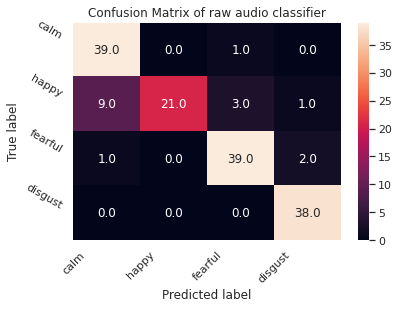

In [0]:
plt.figure(figsize=(10,6))
sns.set()
prediction = model.predict(X_test)
ground_truth = np.argmax(Y_test,axis=1)
pred = np.argmax(prediction,axis=1)
label_idx = np.arange(0,len(observed_emotions))
confusionMatrix = confusion_matrix(ground_truth, pred, labels=label_idx)
fig = plt.figure()   
sns.heatmap(confusionMatrix,annot=True, fmt=".1f")
#cmat_plot = plot_confusion_matrix(conf_mat=confusionMatrix, figsize=(5, 5))
plt.title("Confusion Matrix of raw audio classifier")
tick_marks = np.arange(len(observed_emotions))
plt.xticks(tick_marks, observed_emotions, rotation=45)
plt.yticks(tick_marks, observed_emotions,rotation=-30)
plt.xlabel('Predicted label')
plt.ylabel('True label')

## All emotions mfcc


In [0]:
EMO_DICT= {0:'neutral', 1:'calm', 2:'happy', 3:'sad', 4:'angry', 5:'fearful', 6:'disgust', 7:'surprised'}

dl= data_loader.Data_loader()
data = dl.load_data(mfcc=True, chroma=True, mel=True)
m = simulator(data)
observed_emotions = [str(EMO_DICT[idx]) for idx in range(len(EMO_DICT))]

features_list = ['mfcc']
N = len(observed_emotions)

X, Y = m.create_dataset(observed_emotions, features_list, vector_feature=False)
X, Y =  np.array(X), np.array(Y)

X = np.expand_dims( tf.keras.preprocessing.sequence.pad_sequences(X),axis=0 )
X=np.squeeze(X)
X = np.expand_dims(X, axis=3)
input_shape = (X.shape[1],X.shape[2],1)
input_shape

(165, 40, 1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1337)

In [0]:
model = CNN2D(input_shape=input_shape, target_class_no=N )
#opt = tf.keras.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.1)
#opt = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),optimizer='rmsprop',metrics=['accuracy'])
#model.compile(loss='hinge', optimizer=tf.keras.optimizers.Adadelta(lr=0.1,rho=0.8), metrics=['acc'])

Model: "sequential_110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_111 (Sequential)  (None, 82, 20, 64)        896       
_________________________________________________________________
sequential_112 (Sequential)  (None, 20, 5, 128)        74368     
_________________________________________________________________
sequential_113 (Sequential)  (None, 5, 1, 128)         148096    
_________________________________________________________________
reshape_6 (Reshape)          (None, None, 128)         0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dense_48 (Dense)             (None, 8)                 2056      
Total params: 619,656
Trainable params: 619,016
Non-trainable params: 640
____________________________________________

In [0]:
history = model.fit(X_train, Y_train, batch_size=32,validation_data=(X_test,Y_test), shuffle=True,  epochs = 80)

Epoch 1/80
32/32 [==============================] - 1s 34ms/step - loss: 2.1606 - accuracy: 0.1746 - val_loss: 1.9959 - val_accuracy: 0.2315
Epoch 2/80
32/32 [==============================] - 1s 16ms/step - loss: 1.8411 - accuracy: 0.2976 - val_loss: 1.7773 - val_accuracy: 0.3380
Epoch 3/80
32/32 [==============================] - 0s 15ms/step - loss: 1.6173 - accuracy: 0.3681 - val_loss: 1.7089 - val_accuracy: 0.3611
Epoch 4/80
32/32 [==============================] - 0s 15ms/step - loss: 1.4707 - accuracy: 0.4444 - val_loss: 1.6379 - val_accuracy: 0.3727
Epoch 5/80
32/32 [==============================] - 0s 15ms/step - loss: 1.3716 - accuracy: 0.5020 - val_loss: 2.4011 - val_accuracy: 0.2130
Epoch 6/80
32/32 [==============================] - 0s 15ms/step - loss: 1.2027 - accuracy: 0.5565 - val_loss: 1.4187 - val_accuracy: 0.4514
Epoch 7/80
32/32 [==============================] - 0s 15ms/step - loss: 1.1009 - accuracy: 0.5982 - val_loss: 1.3121 - val_accuracy: 0.4931
Epoch 8/80
32

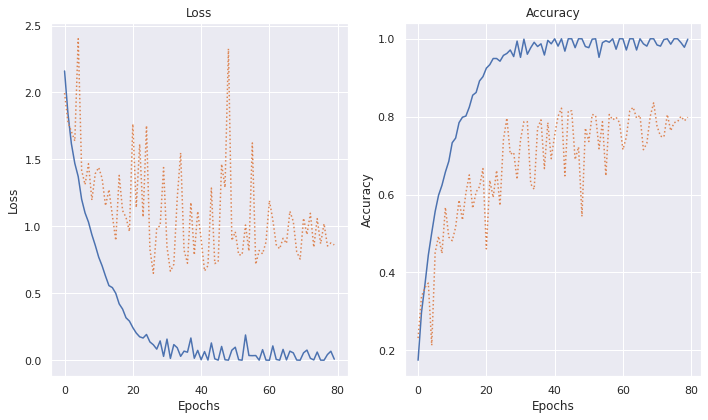

In [0]:
sns.set()
plt.figure(figsize=(10,6))
# plt.plot(history)
# plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(history.history['loss'],label="training data")
plt.plot(history.history['val_loss'],':',label="validation data")
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(122)
plt.plot(history.history['accuracy'],label="training accuracy")
plt.plot(history.history['val_accuracy'],':',label="validation accuracy")
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.tight_layout()

Text(30.5, 0.5, 'True label')

<Figure size 720x432 with 0 Axes>

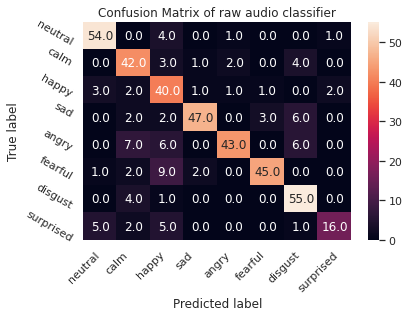

In [0]:
plt.figure(figsize=(10,6))
sns.set()
prediction = model.predict(X_test)
ground_truth = np.argmax(Y_test,axis=1)
pred = np.argmax(prediction,axis=1)
label_idx = np.arange(0,len(observed_emotions))
confusionMatrix = confusion_matrix(ground_truth, pred, labels=label_idx)
fig = plt.figure()   
sns.heatmap(confusionMatrix,annot=True, fmt=".1f")
#cmat_plot = plot_confusion_matrix(conf_mat=confusionMatrix, figsize=(5, 5))
plt.title("Confusion Matrix of raw audio classifier")
tick_marks = np.arange(len(observed_emotions))
plt.xticks(tick_marks, observed_emotions, rotation=45)
plt.yticks(tick_marks, observed_emotions,rotation=-30)
plt.xlabel('Predicted label')
plt.ylabel('True label')

## All emotions 2 fatures

In [0]:
EMO_DICT= {0:'neutral', 1:'calm', 2:'happy', 3:'sad', 4:'angry', 5:'fearful', 6:'disgust', 7:'surprised'}

dl= data_loader.Data_loader()
data = dl.load_data(mfcc=True, chroma=True, mel=True)
m = simulator(data)
observed_emotions = [str(EMO_DICT[idx]) for idx in range(len(EMO_DICT))]

features_list = ['mfcc', 'chroma']
N = len(observed_emotions)

X, Y = m.create_dataset(observed_emotions, features_list, vector_feature=False)
X, Y =  np.array(X), np.array(Y)

X = np.expand_dims( tf.keras.preprocessing.sequence.pad_sequences(X),axis=0 )
X=np.squeeze(X)
X = np.expand_dims(X, axis=3)
input_shape = (X.shape[1],X.shape[2],1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1337)

(165, 52, 1)

In [0]:
model = CNN2D(input_shape=input_shape, target_class_no=N )
opt = tf.keras.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.1)
#opt = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
            optimizer='rmsprop',
            metrics=['accuracy'])
# model.compile(loss='hinge', optimizer=tf.keras.optimizers.Adadelta(lr=0.1,rho=0.8), metrics=['acc'])

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_55 (Sequential)   (None, 82, 26, 64)        896       
_________________________________________________________________
sequential_56 (Sequential)   (None, 20, 6, 128)        74368     
_________________________________________________________________
sequential_57 (Sequential)   (None, 5, 1, 128)         148096    
_________________________________________________________________
reshape_11 (Reshape)         (None, None, 128)         0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 256)               394240    
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 2056      
Total params: 619,656
Trainable params: 619,016
Non-trainable params: 640
_____________________________________________

In [0]:
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), shuffle=True,  epochs = 50)

Epoch 1/50
32/32 [==============================] - 3s 85ms/step - loss: 2.1516 - accuracy: 0.1865 - val_loss: 2.2895 - val_accuracy: 0.1227
Epoch 2/50
32/32 [==============================] - 2s 53ms/step - loss: 1.8819 - accuracy: 0.2440 - val_loss: 1.8149 - val_accuracy: 0.2384
Epoch 3/50
32/32 [==============================] - 2s 52ms/step - loss: 1.6555 - accuracy: 0.3671 - val_loss: 1.7341 - val_accuracy: 0.2801
Epoch 4/50
32/32 [==============================] - 2s 52ms/step - loss: 1.4879 - accuracy: 0.4444 - val_loss: 1.6837 - val_accuracy: 0.3796
Epoch 5/50
32/32 [==============================] - 2s 51ms/step - loss: 1.3620 - accuracy: 0.5010 - val_loss: 2.8573 - val_accuracy: 0.2083
Epoch 6/50
32/32 [==============================] - 2s 52ms/step - loss: 1.2835 - accuracy: 0.5298 - val_loss: 1.4284 - val_accuracy: 0.4722
Epoch 7/50
32/32 [==============================] - 2s 52ms/step - loss: 1.1001 - accuracy: 0.5903 - val_loss: 1.5953 - val_accuracy: 0.4306
Epoch 8/50
32